Primeira Aula

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [49]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [51]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [52]:
df.shape

(133349, 11)

In [53]:
linhas, colunas = df.shape [0], df.shape[1]
print('linhas:', linhas)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [54]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [55]:
translation_map = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=translation_map)

print("As colunas do DataFrame foram traduzidas para:")
print(df.columns)

As colunas do DataFrame foram traduzidas para:
Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [56]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [57]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [58]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [59]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [60]:
translation_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(translation_senioridade)

print("As categorias da coluna 'senioridade' foram traduzidas para:")
print(df['senioridade'].value_counts())

As categorias da coluna 'senioridade' foram traduzidas para:
senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64


In [61]:
translation_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(translation_contrato)

print("As categorias da coluna 'contrato' foram traduzidas para:")
print(df['contrato'].value_counts())

As categorias da coluna 'contrato' foram traduzidas para:
contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64


In [62]:
translation_tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(translation_tamanho_empresa)

print("As categorias da coluna 'tamanho_empresa' foram traduzidas para:")
print(df['tamanho_empresa'].value_counts())

As categorias da coluna 'tamanho_empresa' foram traduzidas para:
tamanho_empresa
Médio      129561
Grande       3574
Pequeno       214
Name: count, dtype: int64


In [63]:
translation_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(translation_remoto)

print("As categorias da coluna 'remoto' foram traduzidas para:")
print(df['remoto'].value_counts())

As categorias da coluna 'remoto' foram traduzidas para:
remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64


In [64]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [65]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [66]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Segunda Aula

In [67]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [69]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [70]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [71]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [72]:
import numpy as np

# Criação de um dataframe de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ['Guilherme', 'Biel', 'Vini', 'Madruga', 'Leo'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Calcula a média salarial e substitui os nulos pela média e arredonda os valores.
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#Calcula a mediana salarial e substitui os nulos pela mediana, mas não arredonda os valores. (Nota: Para arredondar os valores basta colocar o ".round(2)")
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Guilherme,4000.0,4000.00,4000.0
1,Biel,NaN,36333.33,5000.0
2,Vini,5000.0,5000.00,5000.0
3,Madruga,NaN,36333.33,5000.0
4,Leo,100000.0,100000.00,100000.0


In [73]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# Ffill é uma função da biblioteca "pandas" que faz o preenchimento de campos vazios com dados anteriores a ele.
df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [74]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

# Bfill é uma função da biblioteca "pandas" que faz o preenchimento de campos vazios com dados posteriores a ele.
df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [75]:
df_cidades = pd.DataFrame({
    'nome': ['Guilherme', 'Biel', 'Vini', 'Madruga', 'Leo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

# fillna é uma função da biblioteca "pandas" que faz o preenchimento de campos vazios com os dados que nós fornecermos a ele.
df_cidades["cidade_preenchida"] = df_cidades['cidade'].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Guilherme,São Paulo,São Paulo
1,Biel,NaN,Não Informado
2,Vini,Curitiba,Curitiba
3,Madruga,NaN,Não Informado
4,Leo,Belém,Belém


In [76]:
df_limpo = df.dropna()

In [77]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [78]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [79]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [80]:
df_limpo['ano'] = df_limpo['ano'].astype(int)

/tmp/ipython-input-175752573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['ano'] = df_limpo['ano'].astype(int)


TERCEIRA AULA

In [81]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

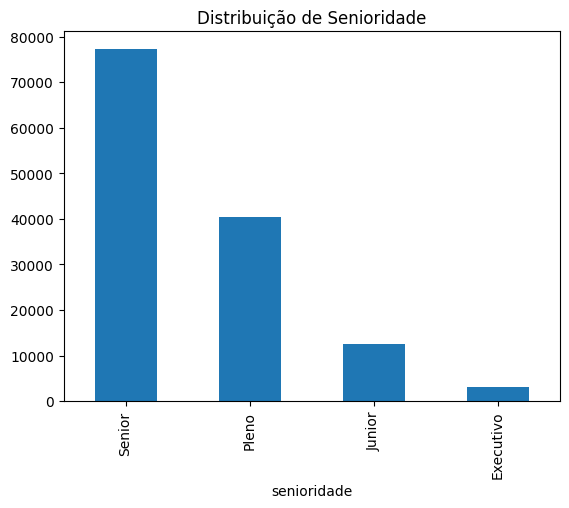

In [82]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de Senioridade")

<Axes: xlabel='senioridade', ylabel='usd'>

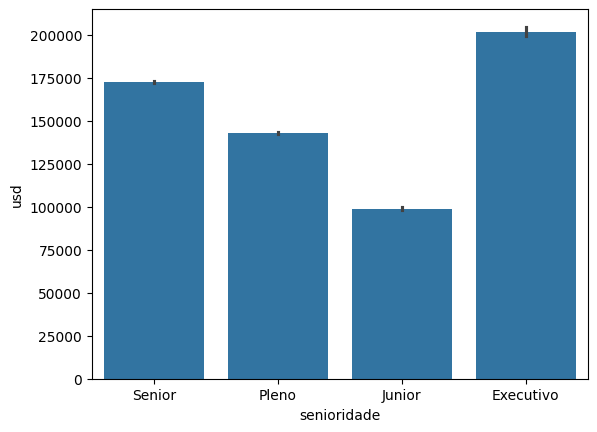

In [83]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

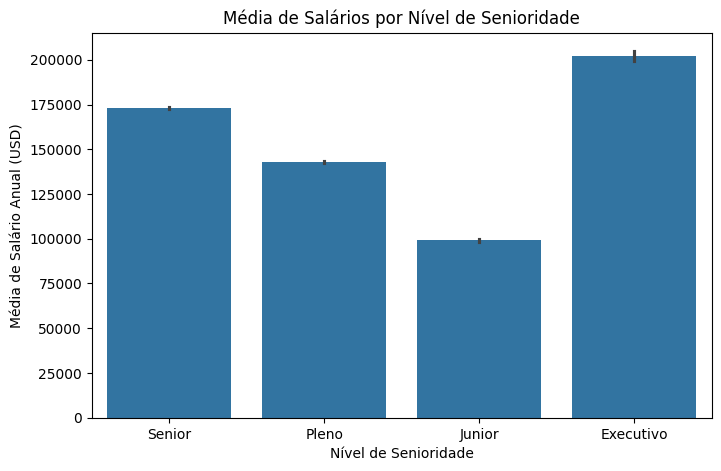

In [84]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Média de Salários por Nível de Senioridade")
plt.xlabel("Nível de Senioridade")
plt.ylabel("Média de Salário Anual (USD)")
plt.show()

In [85]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [86]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index

In [87]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

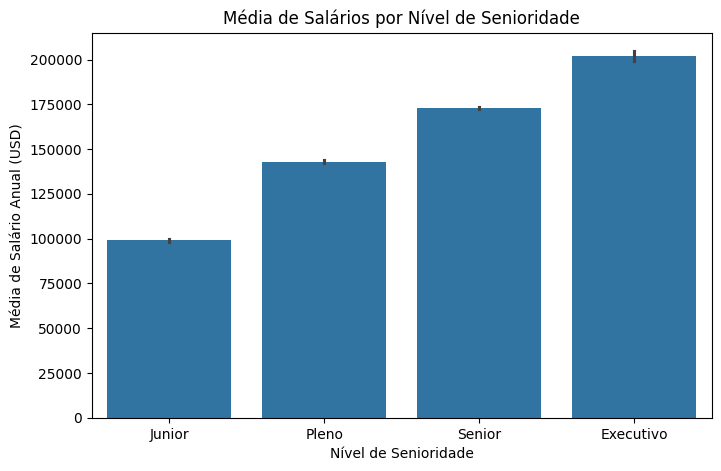

In [88]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order = ordem)
plt.title("Média de Salários por Nível de Senioridade")
plt.xlabel("Nível de Senioridade")
plt.ylabel("Média de Salário Anual (USD)")
plt.show()

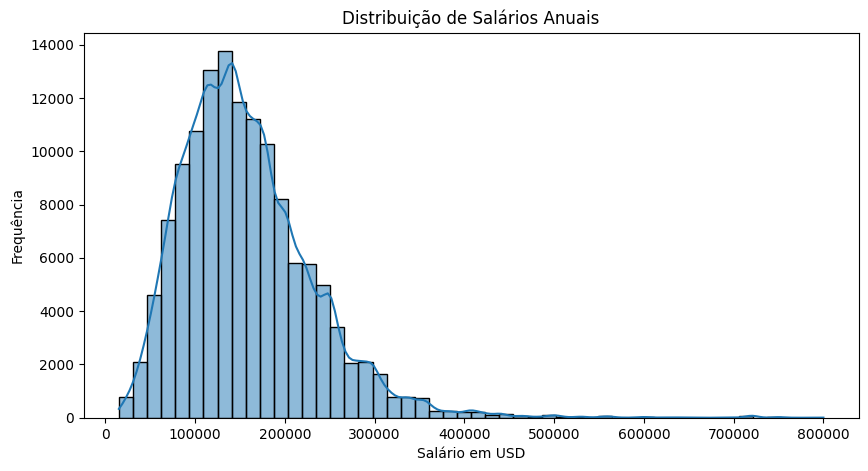

In [89]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo["usd"], bins = 50, kde=True)
plt.title("Distribuição de Salários Anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

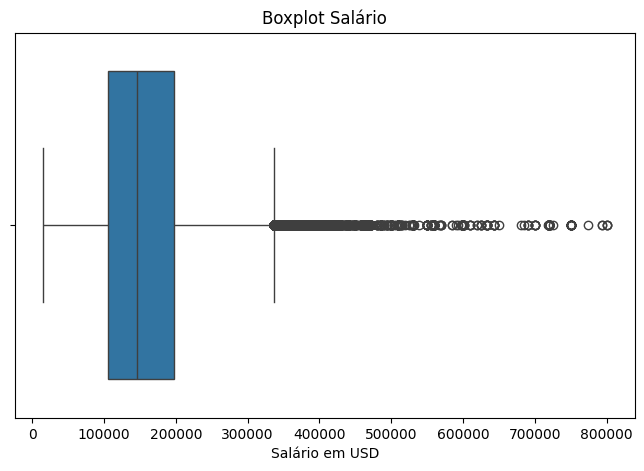

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo["usd"])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

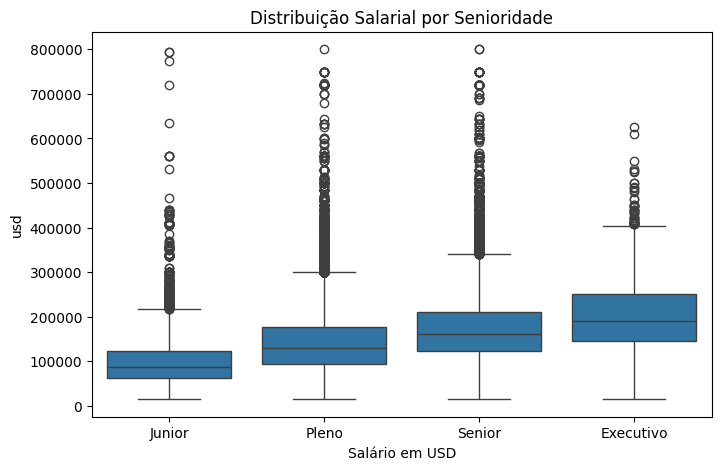

In [91]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Distribuição Salarial por Senioridade")
plt.xlabel("Salário em USD")
plt.show()

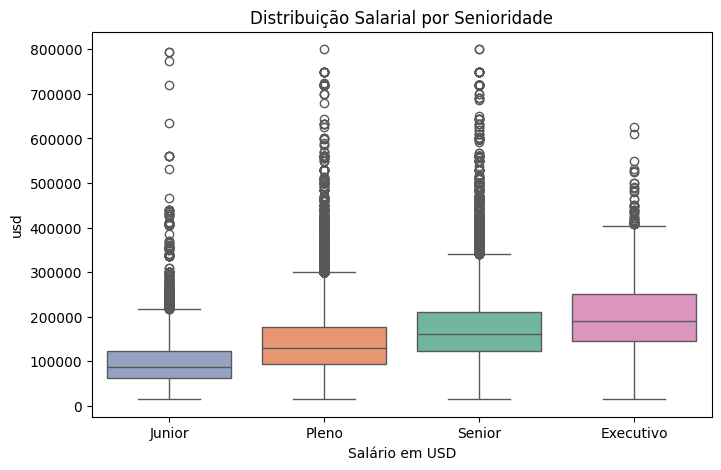

In [92]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Distribuição Salarial por Senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [93]:
senioridade_media_salario = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média de Salários por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média de Salário Anual (USD)'})

fig.show()

In [94]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )
fig.show()

In [95]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.show()

In [96]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [97]:
pip install pycountry

In [98]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

/tmp/ipython-input-2291682182.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [100]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)

QUARTA AULA

Aprender a usar a biblioteca Streamlit para a criação de um dashboard interativo simples, que permite visualizar dados filtrados e gerar gráficos de forma prática.

https://dashboard-salarios-dados.streamlit.app/

Criar o ambiente virtual:
python3 -m venv .venv
Ativar o ambiente virtual em Windows:
.venv\Scripts\Activate
Ativar o ambiente virtual em MAC/LINUX:
source .venv/bin/activate
Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários
pandas==2.2.3
streamlit==1.44.1
plotly==5.24.1
Instalar as bibliotecas necessárias
pip install -r requirements.txt
Criar a Interface do Dashboard com Streamlit

Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Configuração da Página ---
# Define o título da página, o ícone e o layout para ocupar a largura inteira.
st.set_page_config(
    page_title="Dashboard de Salários na Área de Dados",
    page_icon="📊",
    layout="wide",
)

# --- Carregamento dos dados ---
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# --- Barra Lateral (Filtros) ---
st.sidebar.header("🔍 Filtros")

# Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
# O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

# --- Conteúdo Principal ---
st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

# --- Métricas Principais (KPIs) ---
st.subheader("Métricas gerais (Salário anual em USD)")

if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Salário médio", f"${salario_medio:,.0f}")
col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---")

# --- Análises Visuais com Plotly ---
st.subheader("Gráficos")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtrado.empty:
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de cargos.")

with col_graf2:
    if not df_filtrado.empty:
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        grafico_hist.update_layout(title_x=0.1)
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de distribuição.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtrado.empty:
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
        )
        grafico_remoto.update_traces(textinfo='percent+label')
        grafico_remoto.update_layout(title_x=0.1)
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

with col_graf4:
    if not df_filtrado.empty:
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
        grafico_paises.update_layout(title_x=0.1)
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de países.")

# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
st.dataframe(df_filtrado)
